In [2]:
import os
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",100)
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
#shape of the dataset (13k rows and 9 features)

data.shape

(13320, 9)

In [5]:
#to get the information about the dataset i.e. featuess,data_types etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
#features of our dataset

print(data.columns)
print(len(data.columns))

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')
9


### Exploratory Data Analysis(EDA)

#### univariate analysis

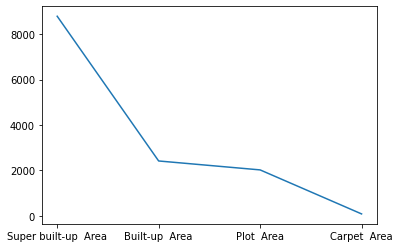

In [9]:
plt.plot(data['area_type'].value_counts())

##### Super area built up contains higher no of houses than rest areas

#### convert total_sqft feature into numrics format

In [12]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
data=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_sqft_tonum)

<Figure size 1008x432 with 0 Axes>

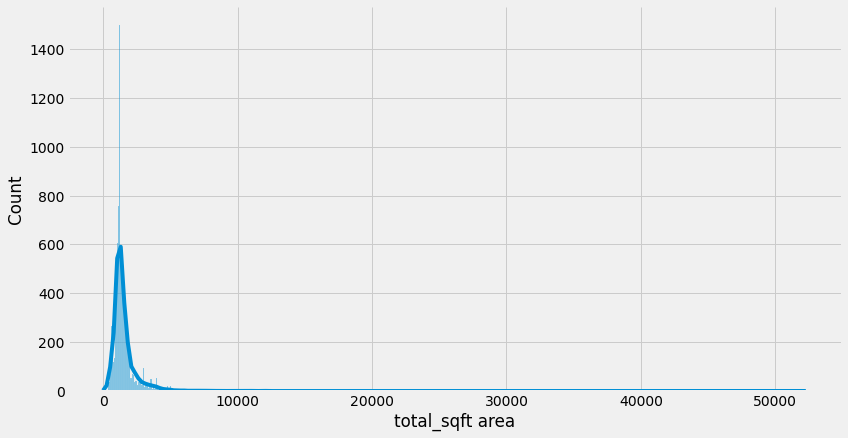

In [15]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,6))
sb.displot(x = data["total_sqft"].values, kde = True, height = 6, aspect = 2)
plt.xlabel("total_sqft area");

13


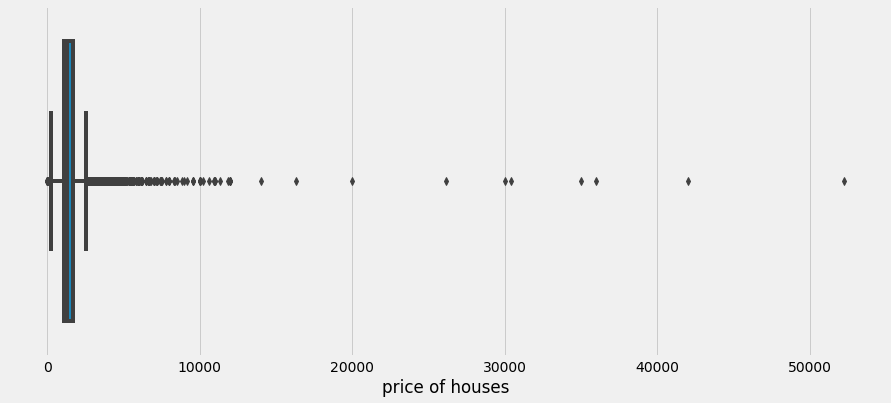

In [16]:
outier_count = data[data['price']>2000]
print(outier_count.shape[0])

#13 values are treated as outliers

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,6))
sb.boxplot(x = data["total_sqft"])
plt.xlabel("price of houses");

In [17]:
data_loc = data[['location']]

lc_grp = data_loc.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [18]:
demanded_10_locs = data['location'].value_counts()
demanded_df = pd.DataFrame({'location_names':demanded_10_locs[:10].index, 'no_of_houses':demanded_10_locs[:10].values})
demanded_df

,location_names,no_of_houses
0,Whitefield,540
1,Sarjapur Road,399
2,Electronic City,302
3,Kanakpura Road,273
4,Thanisandra,234
5,Yelahanka,213
6,Uttarahalli,186
7,Hebbal,177
8,Marathahalli,175
9,Raja Rajeshwari Nagar,171


location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64


Text(0.5, 0, 'no_of_houses')

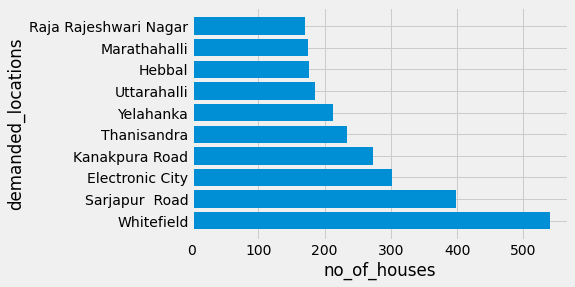

In [19]:
print(lc_grp)

plt.barh(demanded_df['location_names'],demanded_df['no_of_houses'],)
plt.ylabel("demanded_locations")
plt.xlabel("no_of_houses")

#### Bivariate Analysis

<AxesSubplot: >

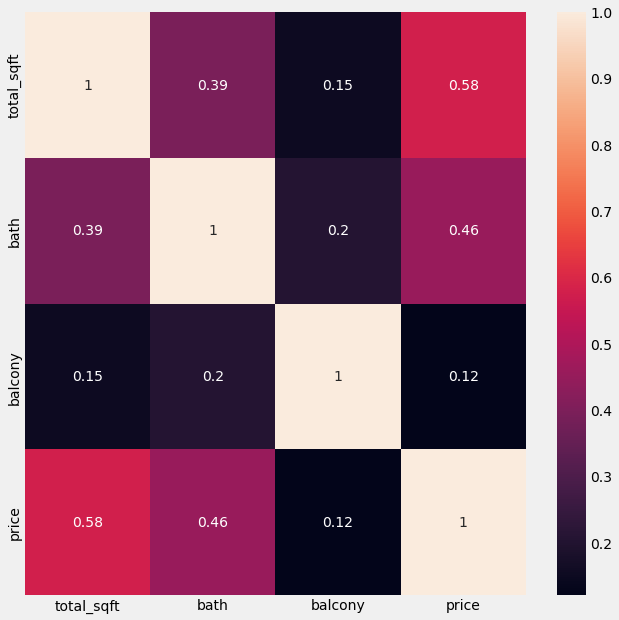

In [21]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(),annot=True)

##### no_of_bathrooms and total_sqft_area are highly correlated to price column, hence better features for feature selection.
##### balcony is not much correlated to price column, i.e. will not add any significant change to model parameters...can be dropped off

Text(0.5, 1.0, 'relation between area_type and price of houses')

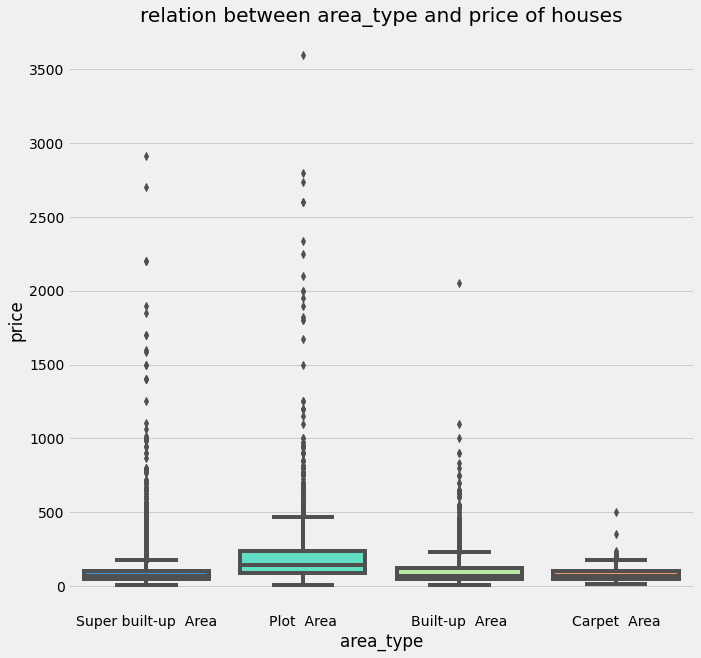

In [23]:
plt.figure(figsize=(10,10))
sb.boxplot(x='area_type',y='price',data=data, palette='rainbow',)
plt.title("relation between area_type and price of houses")

<AxesSubplot: xlabel='area_type', ylabel='price'>

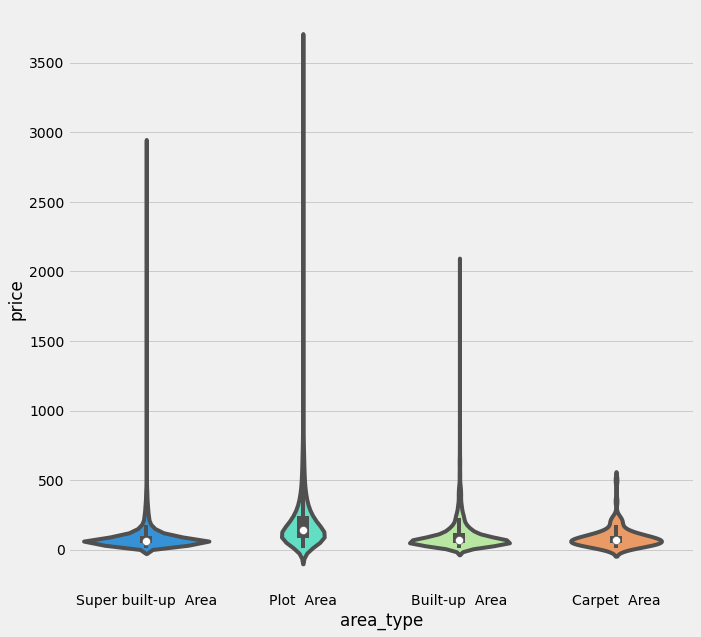

In [25]:
plt.figure(figsize=(10,10))
sb.violinplot(x='area_type',y='price',data=data,palette='rainbow')

<Figure size 720x720 with 0 Axes>

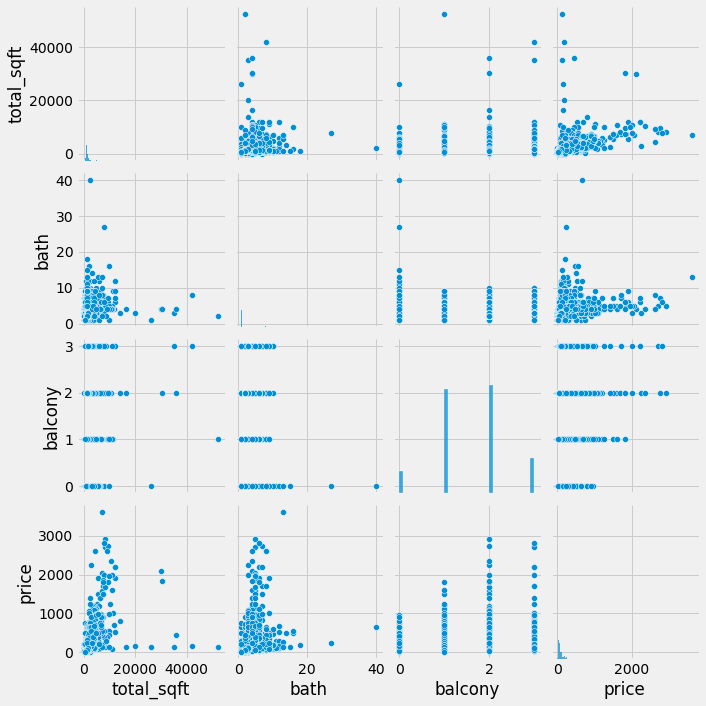

In [27]:
#let's see covariance in between diff features
plt.figure(figsize=(10,10))
sb.pairplot(data)

#### from above plot it seems that, scatter is almost linear and columns are also linearly dependent on independent column i.e. price 

## Data Cleaning
 
#### as area_type, availability, balcony and society columns are secondary parameters that will not add any value to the price column during prediction,only increase dimensions of the data.

In [28]:
data=data.drop(['area_type','availability','balcony','society'],axis=1)
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00
13316,Richards Town,4 BHK,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00


In [29]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

#### Let's remove the Null values from the dataset

In [30]:
data.isnull().sum()

location       1
size          16
total_sqft    46
bath          73
price          0
dtype: int64

In [31]:
count=0
for i in data.columns:
    cols = data.columns
    print(f"null values at {cols[count]} are {data[i].isnull().sum()/data.shape[0]*100} %")
    count+=1

null values at location are 0.0075075075075075074 %
null values at size are 0.12012012012012012 %
null values at total_sqft are 0.34534534534534533 %
null values at bath are 0.5480480480480481 %
null values at price are 0.0 %


##### as from the above it seems that total_sqft and price doesn't contain any null values
##### location col also has negligible null values ~ 1, can be dropped off
##### size contain 16 null_values can be dropped, will not add any significant change in the dataset.

In [33]:
data = data.dropna()
'''
data['location']=data['location'].dropna()
data['size']=data['size'].dropna()
'''

"\ndata['location']=data['location'].dropna()\ndata['size']=data['size'].dropna()\n"

In [34]:
data_val = data.groupby('size').count()
data_val

,location,total_sqft,bath,price
size,,,,
1 BHK,527,527,527,527
1 Bedroom,100,100,100,100
1 RK,13,13,13,13
10 BHK,2,2,2,2
10 Bedroom,12,12,12,12
11 BHK,2,2,2,2
11 Bedroom,2,2,2,2
12 Bedroom,1,1,1,1
13 BHK,1,1,1,1


In [35]:
print(type(data['bath'][0]))
print(data['bath'].unique())
print(data['bath'].value_counts())

<class 'numpy.float64'>
[ 2.  5.  3.  4.  6.  1.  9.  8.  7. 11. 10. 14. 27. 12. 16. 40. 15. 13.
 18.]
2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64


In [ ]:
#the null values of the bath col can be replaced by most frequent value from the data.

data['bath'] = data['bath'].fillna(2.0)

In [ ]:
#size column has to be converted into numeric format.

data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
data.drop('size',axis=1,inplace=True)

In [43]:
data.shape

(13200, 5)

In [45]:
data.to_csv('processed_data.csv')